# Import

In [93]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import optuna
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_auc_score, 
    precision_recall_curve, 
    accuracy_score, 
    average_precision_score, roc_curve, brier_score_loss)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,  StratifiedKFold
from sklearn.inspection import permutation_importance
from sklearn.calibration import calibration_curve



# Data exploration

In [94]:
data = load_breast_cancer(as_frame=True)
FIG_DIR = Path("..") / "reports/figures"

In [4]:
data.frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
data.frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [19]:
na = data.frame.isna().sum()
print(f"Number of missing values in the dataset: {na.sum()}")

Number of missing values in the dataset: 0


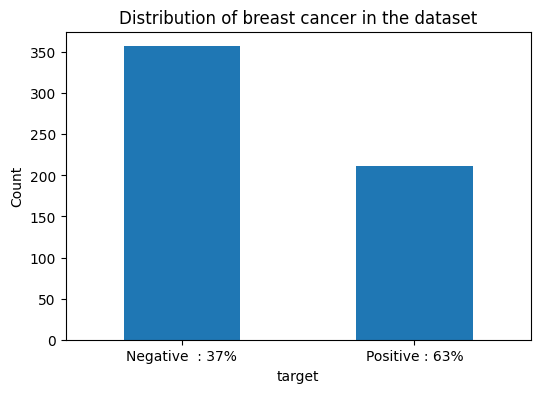

In [32]:
plt.figure(figsize= (6,4))
neg = data.frame["target"].value_counts(normalize = True)[1]
pos = data.frame["target"].value_counts(normalize = True)[0]
data.frame["target"].value_counts().plot(kind = "bar")
plt.xticks(ticks=[0,1], labels=[f"Negative  : {pos:.0%}", f"Positive : {neg:.0%}"], rotation=0)
plt.ylabel("Count")
plt.title("Distribution of breast cancer in the dataset")
plt.show()


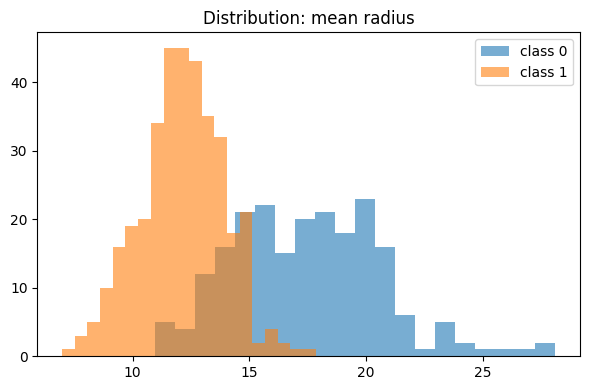

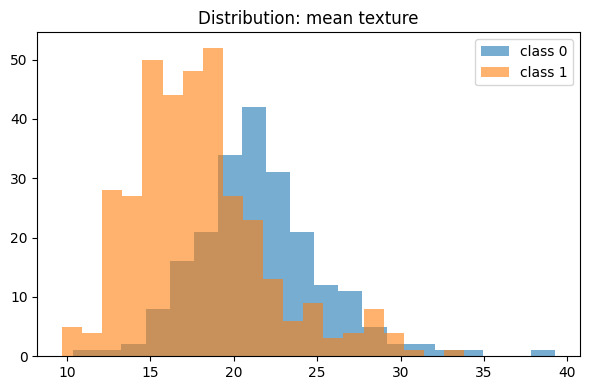

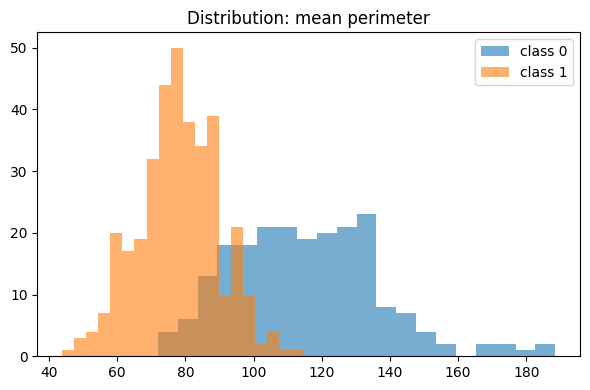

In [28]:
df = data.frame.copy()
features = ["mean radius", "mean texture", "mean perimeter"]

for col in features:
    plt.figure(figsize=(6,4))
    plt.hist(df.loc[df["target"]==0, col], bins=20, alpha=0.6, label="class 0")
    plt.hist(df.loc[df["target"]==1, col], bins=20, alpha=0.6, label="class 1")
    plt.title(f"Distribution: {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()


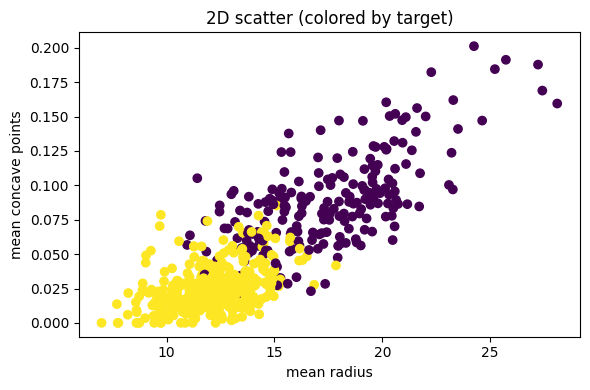

In [ ]:
xcol, ycol = "mean radius", "mean concave points"
plt.figure(figsize=(6,4))
plt.scatter(df[xcol], df[ycol], c=df["target"])
plt.xlabel(xcol)
plt.ylabel(ycol)
plt.title("2D scatter (colored by target)")
plt.tight_layout()
plt.show()


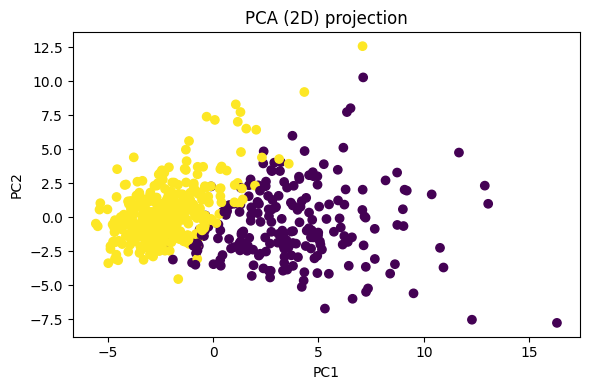

Explained variance ratio: [0.44272026 0.18971182]


In [ ]:


X = df.drop(columns=["target"])
y = df["target"]

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2D) projection")
plt.tight_layout()
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)


# Tune hyperparameters

In [45]:
X = data.data
y = data.target
y_clinical = (y == 0).astype(int)  # malignant becomes 1

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y_clinical, test_size = 0.2, random_state = 42, stratify = y) # stratify to maintain class distribution

In [60]:
def objective(trial):
    
    model_name = trial.suggest_categorical("model", ["logistic_regression", "svm_linear", "svm_rbf"])

    if model_name == "svm_linear":
        model = SVC(
            kernel = "linear",
            C=trial.suggest_float("svm_c", 1e-3, 1e2, log=True),
            class_weight = "balanced",
        )

    elif model_name == "svm_rbf":
        model = SVC(
            kernel = "rbf",
            C=trial.suggest_float("svm_c", 1e-3, 1e2, log=True),
            gamma=trial.suggest_float("svm_gamma", 1e-4, 1e-1, log=True),
            class_weight = "balanced",
        )

    else:  # logistic_regression
        model = LogisticRegression(
            C=trial.suggest_float("lr_c", 1e-3, 1e2, log=True),
            solver="liblinear",
            class_weight = "balanced",
        )
        
    pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(pipeline, X, y_clinical, cv=cv, scoring="recall").mean()
    return score
    
        

In [61]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed = 42))
study.optimize(objective, n_trials=50)

# Print the best parameters and accuracy score
print("Best model:", study.best_params)
print("Best score:", study.best_value)

[I 2025-12-22 17:30:28,622] A new study created in memory with name: no-name-5f3e67f3-8c6d-4edd-8fca-9a2ed1b82fa7
[I 2025-12-22 17:30:28,646] Trial 0 finished with value: 0.9623477297895903 and parameters: {'model': 'svm_linear', 'svm_c': 0.9846738873614566}. Best is trial 0 with value: 0.9623477297895903.
[I 2025-12-22 17:30:28,670] Trial 1 finished with value: 0.953045404208195 and parameters: {'model': 'logistic_regression', 'lr_c': 21.42302175774105}. Best is trial 0 with value: 0.9623477297895903.
[I 2025-12-22 17:30:28,737] Trial 2 finished with value: 0.9387596899224807 and parameters: {'model': 'svm_linear', 'svm_c': 70.72114131472235}. Best is trial 0 with value: 0.9623477297895903.
[I 2025-12-22 17:30:28,754] Trial 3 finished with value: 0.9575858250276854 and parameters: {'model': 'logistic_regression', 'lr_c': 0.008260808399079604}. Best is trial 0 with value: 0.9623477297895903.
[I 2025-12-22 17:30:28,775] Trial 4 finished with value: 0.9483942414174973 and parameters: {'m

Best model: {'model': 'svm_rbf', 'svm_c': 1.0706812762882416, 'svm_gamma': 0.03986150095052724}
Best score: 0.9717607973421927


# Test best model

In [95]:
def evaluate_preds(y_true, y_proba, threshold = 0.5, model_name = "model"):
    y_pred = (y_proba >= threshold).astype(int)
    rep = classification_report(y_true, y_pred, output_dict=True, zero_division=0)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return {
        "model": model_name,
        "threshold": threshold,

        "accuracy": accuracy_score(y_true, y_pred),
        "roc_auc": roc_auc_score(y_true, y_proba),
        "pr_auc": average_precision_score(y_true, y_proba),

        "precision_1": rep["1"]["precision"],
        "recall_1": rep["1"]["recall"],

        "tn": tn, "fp": fp, "fn": fn, "tp": tp,
    }

def plot_roc_pr(y_true, y_proba, name="model"):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC curve - {name}")
    plt.tight_layout()
    plt.savefig(FIG_DIR / f"roc_{name}.png", dpi=200)
    plt.show()

    prec, rec, _ = precision_recall_curve(y_true, y_proba)
    plt.figure(figsize=(5,4))
    plt.plot(rec, prec)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"PR curve - {name}")
    plt.tight_layout()
    plt.savefig(FIG_DIR / f"pr_{name}.png", dpi=200)
    plt.show()

def show_confusion(y_true, y_proba, threshold=0.5, name="model"):
    y_pred = (y_proba >= threshold).astype(int)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, values_format="d")
    plt.title(f"Confusion matrix - {name} : thr={threshold:.2f}")
    plt.tight_layout()
    plt.savefig(FIG_DIR / f"cm_{name}_thr_{threshold:.2f}.png", dpi=200)
    plt.show()


    

In [69]:
best_model_name = study.best_params["model"]
best_model =  SVC(kernel = "rbf", random_state = 42, 
                  C= study.best_params["svm_c"], gamma = study.best_params["svm_gamma"], 
                  class_weight = "balanced", probability = True)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", best_model)
])

pipeline.fit(X_train, y_train)
y_probas = pipeline.predict_proba(X_test)[:,1]
reports = evaluate_preds(y_test, y_probas, threshold = 0.5, model_name = best_model_name)
  
results_df = pd.DataFrame([reports]) 
results_df 

,model,threshold,accuracy,roc_auc,pr_auc,precision_1,recall_1,tn,fp,fn,tp
0,svm_rbf,0.5,0.973684,0.994048,0.991764,0.953488,0.97619,70,2,1,41


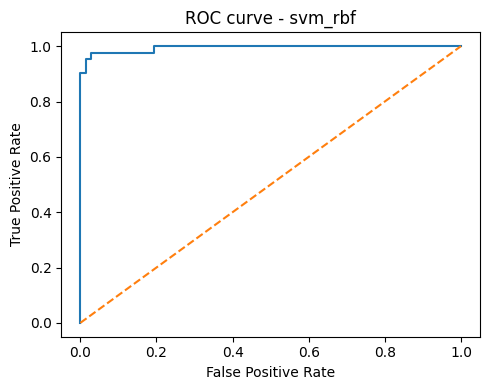

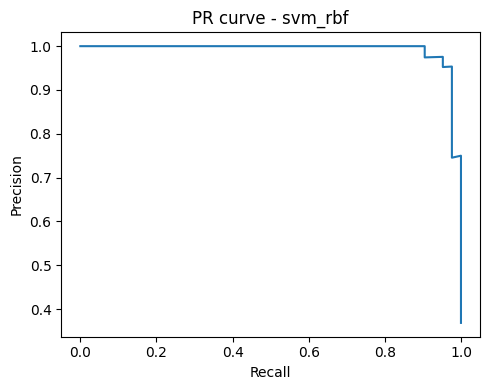

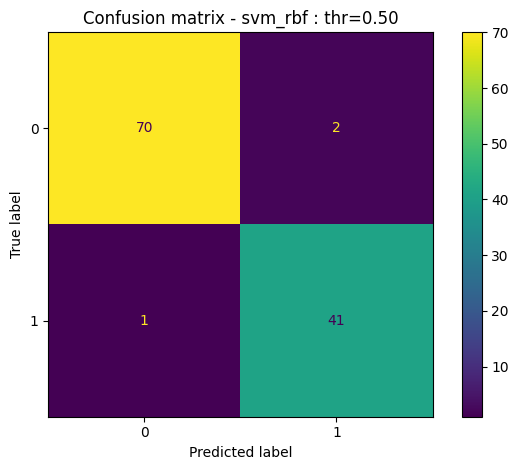

In [96]:
plot_roc_pr(y_test, y_probas, name=best_model_name)
show_confusion(y_test, y_probas, threshold=0.5, name=best_model_name)


# Interpretation

In [86]:
results = permutation_importance(pipeline,
                                  X_test, 
                                  y_test,
                                  n_repeats = 25,
                                  scoring="average_precision",
                                  n_jobs=-1)
df_importance = pd.DataFrame({
    "feature" : X.columns,
    "importance_mean": results.importances_mean,
    "importance_std": results.importances_std}).sort_values("importance_mean", ascending = False)

df_importance.head(10)

,feature,importance_mean,importance_std
24,worst smoothness,0.004676,0.003840
20,worst radius,0.003845,0.004739
21,worst texture,0.003218,0.004115
23,worst area,0.003157,0.004069
22,worst perimeter,0.002854,0.004041
27,worst concave points,0.002713,0.003904
26,worst concavity,0.001915,0.001890
7,mean concave points,0.001844,0.003102
29,worst fractal dimension,0.001821,0.001302
10,radius error,0.001746,0.002191


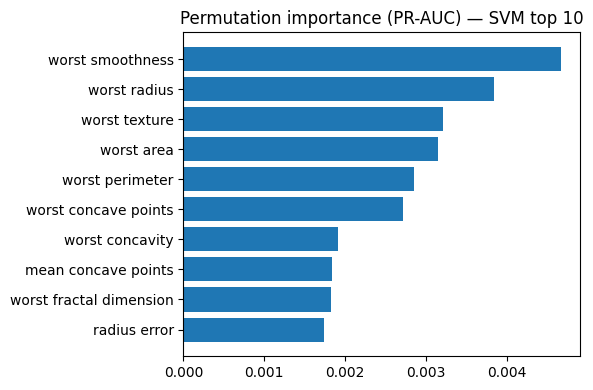

In [98]:
top_perm_df = df_importance.head(10).iloc[::-1]
plt.figure(figsize=(6,4))
plt.barh(top_perm_df["feature"], top_perm_df["importance_mean"])
plt.title("Permutation importance (PR-AUC) — SVM top 10")
plt.tight_layout()
plt.savefig(FIG_DIR / "permutation_importance.png", dpi=200)
plt.show()

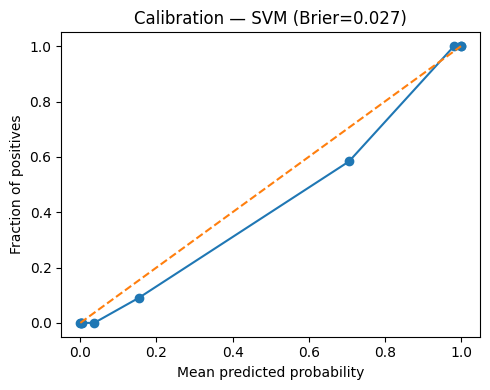

In [99]:
brier = brier_score_loss(y_test, y_probas)
frac_pos, mean_pred = calibration_curve(y_test, y_probas, n_bins=10, strategy="quantile")

plt.figure(figsize=(5,4))
plt.plot(mean_pred, frac_pos, marker="o")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title(f"Calibration — SVM (Brier={brier:.3f})")
plt.tight_layout()
plt.savefig(FIG_DIR / "calibration_curve.png", dpi=200)
plt.show()

